In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Generate 10 points from a 2D Gaussian distribution
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  # Covariance matrix
points = np.random.multivariate_normal(mean, cov, 10)

# Compute the convex hull of the points
hull = ConvexHull(points)

# Function to calculate the polar set of a convex hull
def compute_polar_set(hull_points):
    # The polar set is computed by taking the inverse of the supporting hyperplanes (here, lines) of the convex hull
    # Normalize the normal vectors of the convex hull
    edges = np.diff(hull_points[hull.vertices], axis=0, append=hull_points[hull.vertices[0]])
    normals = np.array([-edges[:, 1], edges[:, 0]]).T
    normals = normals / np.linalg.norm(normals, axis=1, keepdims=True)
    
    # Polar set vertices are obtained by inverting these normal vectors
    polar_vertices = normals / np.sum(hull_points[hull.vertices] * normals, axis=1)[:, np.newaxis]
    
    return polar_vertices

# Get the polar set vertices
polar_vertices = compute_polar_set(points)

# Plotting the original points and their convex hull
plt.figure(figsize=(8, 8))

# Original points and convex hull
plt.plot(points[:, 0], points[:, 1], 'o', label="Gaussian Points")
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Plotting the polar set
plt.plot(polar_vertices[:, 0], polar_vertices[:, 1], 'ro-', label="Polar Set")

plt.title("Gaussian Cluster of 10 Points and its Polar Set")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

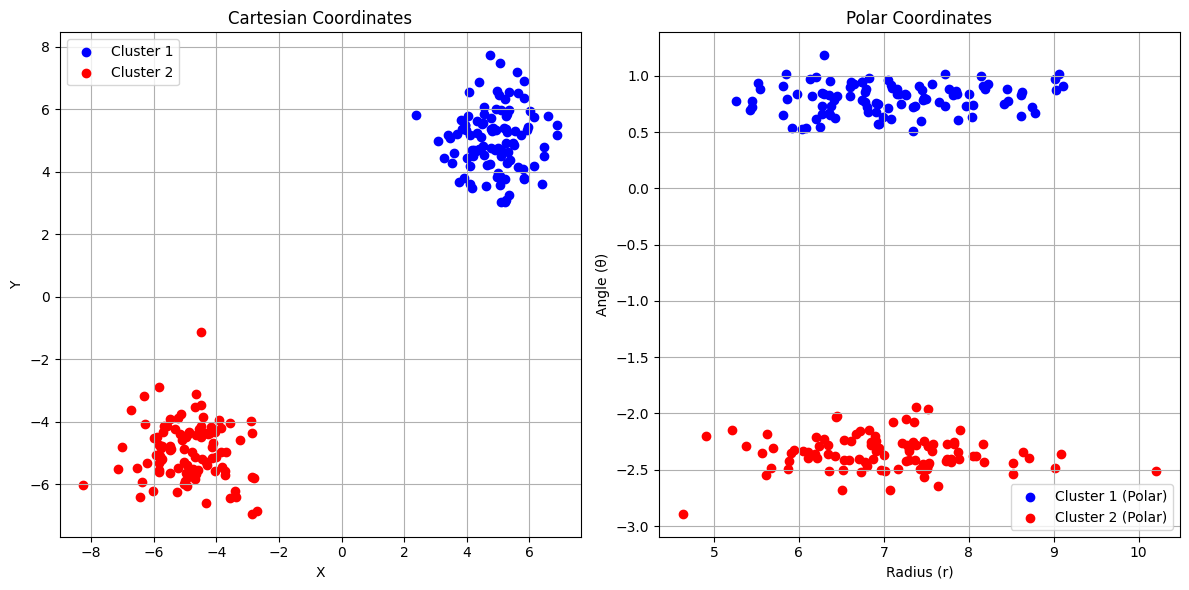

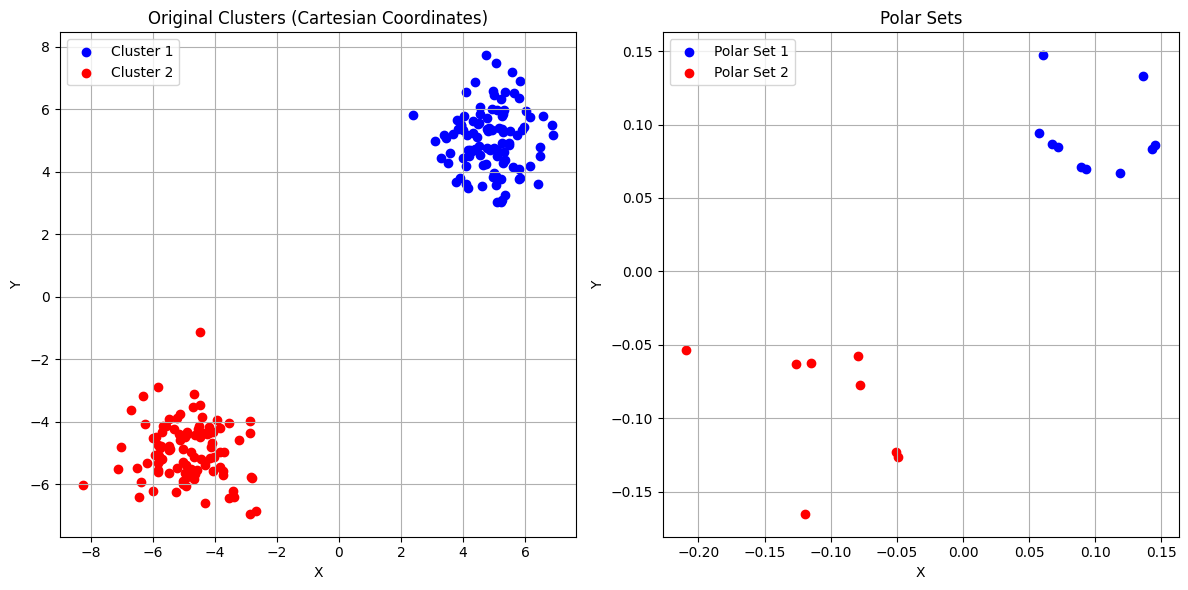

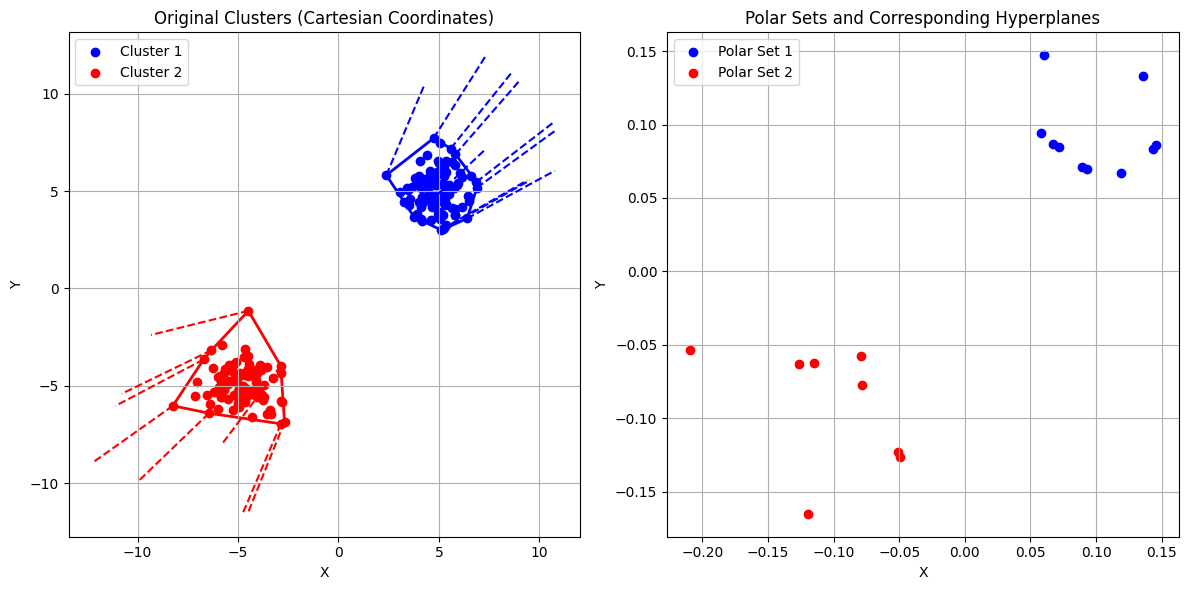

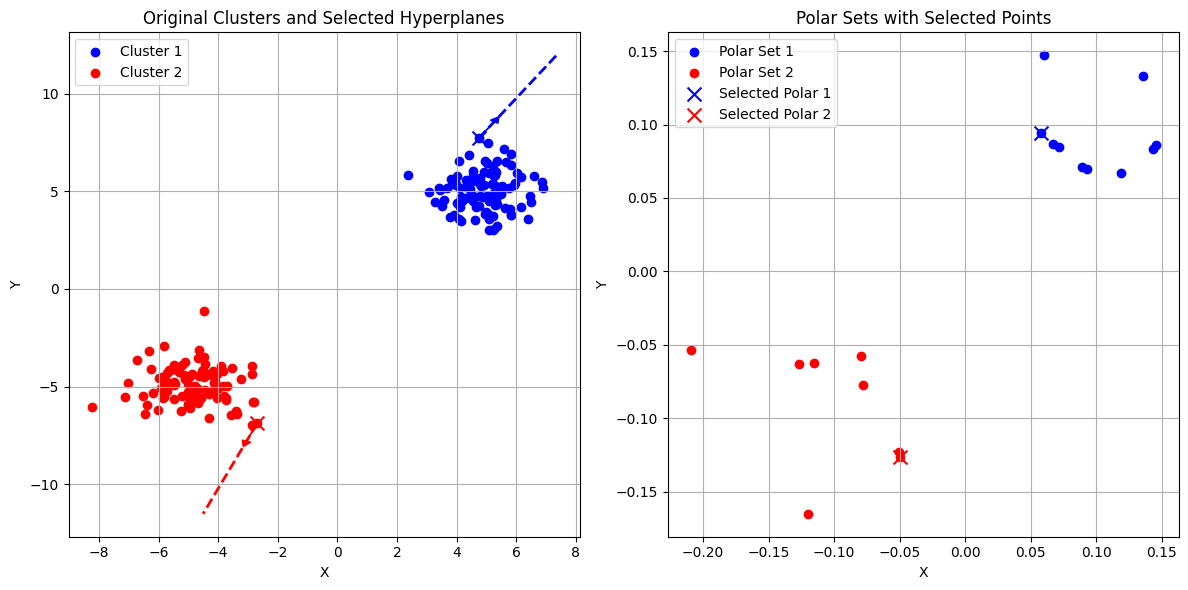

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two clusters of data points (non-overlapping, not centered at the origin)
np.random.seed(42)

# Cluster 1: centered at (5, 5)
cluster_1 = np.random.normal(loc=[5, 5], scale=1, size=(100, 2))

# Cluster 2: centered at (-5, -5)
cluster_2 = np.random.normal(loc=[-5, -5], scale=1, size=(100, 2))

# Function to convert to polar coordinate
def to_polar(coords):
    r = np.sqrt(coords[:, 0]**2 + coords[:, 1]**2)
    theta = np.arctan2(coords[:, 1], coords[:, 0])
    return np.column_stack((r, theta))

# Convert both clusters to polar coordinates
polar_cluster_1 = to_polar(cluster_1)
polar_cluster_2 = to_polar(cluster_2)

# Plotting the clusters and their polar sets
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the Cartesian coordinates
ax[0].scatter(cluster_1[:, 0], cluster_1[:, 1], color='blue', label='Cluster 1')
ax[0].scatter(cluster_2[:, 0], cluster_2[:, 1], color='red', label='Cluster 2')
ax[0].set_title('Cartesian Coordinates')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].legend()
ax[0].grid(True)

# Plot the Polar coordinates
ax[1].scatter(polar_cluster_1[:, 0], polar_cluster_1[:, 1], color='blue', label='Cluster 1 (Polar)')
ax[1].scatter(polar_cluster_2[:, 0], polar_cluster_2[:, 1], color='red', label='Cluster 2 (Polar)')
ax[1].set_title('Polar Coordinates')
ax[1].set_xlabel('Radius (r)')
ax[1].set_ylabel('Angle (θ)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
from scipy.spatial import ConvexHull

# Function to compute the polar set of a convex set
def polar_set(points):
    # Compute the convex hull of the points
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]
    
    # Compute the polar set (1 / dot product with each hull point)
    polar_points = []
    for point in hull_points:
        # Polar point is normalized by 1 / dot product with point
        dot_product = np.dot(point, point)
        polar_point = point / dot_product
        polar_points.append(polar_point)
    
    return np.array(polar_points)

# Compute the polar sets of the two clusters
polar_cluster_1_set = polar_set(cluster_1)
polar_cluster_2_set = polar_set(cluster_2)

# Plot the original clusters and their polar sets
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the Cartesian coordinates (original clusters)
ax[0].scatter(cluster_1[:, 0], cluster_1[:, 1], color='blue', label='Cluster 1')
ax[0].scatter(cluster_2[:, 0], cluster_2[:, 1], color='red', label='Cluster 2')
ax[0].set_title('Original Clusters (Cartesian Coordinates)')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].legend()
ax[0].grid(True)

# Plot the polar sets
ax[1].scatter(polar_cluster_1_set[:, 0], polar_cluster_1_set[:, 1], color='blue', label='Polar Set 1')
ax[1].scatter(polar_cluster_2_set[:, 0], polar_cluster_2_set[:, 1], color='red', label='Polar Set 2')
ax[1].set_title('Polar Sets')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

from matplotlib.patches import Polygon
from matplotlib.lines import Line2D

# Function to draw hyperplanes corresponding to the polar set
def draw_hyperplanes(ax, hull, polar_points, color):
    # Draw the convex hull
    hull_polygon = Polygon(hull.points[hull.vertices], edgecolor=color, fill=False, linewidth=2, label='Convex Hull')
    ax.add_patch(hull_polygon)

    # Draw hyperplanes
    for i, vertex in enumerate(hull.points[hull.vertices]):
        polar_point = polar_points[i]
        normal = polar_point / np.linalg.norm(polar_point)

        # Hyperplane is perpendicular to the polar point and passes through the convex hull point
        hyperplane = Line2D(
            [vertex[0], vertex[0] + normal[0] * 5],
            [vertex[1], vertex[1] + normal[1] * 5],
            color=color,
            linestyle="--",
            label='Hyperplane' if i == 0 else ''
        )
        ax.add_line(hyperplane)

# Plot the clusters, polar sets, and hyperplanes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the Cartesian coordinates (original clusters)
ax[0].scatter(cluster_1[:, 0], cluster_1[:, 1], color='blue', label='Cluster 1')
ax[0].scatter(cluster_2[:, 0], cluster_2[:, 1], color='red', label='Cluster 2')
ax[0].set_title('Original Clusters (Cartesian Coordinates)')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].legend()
ax[0].grid(True)

# Convex hulls of the clusters
hull_1 = ConvexHull(cluster_1)
hull_2 = ConvexHull(cluster_2)

# Draw the convex hulls and hyperplanes corresponding to polar points
draw_hyperplanes(ax[0], hull_1, polar_cluster_1_set, 'blue')
draw_hyperplanes(ax[0], hull_2, polar_cluster_2_set, 'red')

# Plot the polar sets
ax[1].scatter(polar_cluster_1_set[:, 0], polar_cluster_1_set[:, 1], color='blue', label='Polar Set 1')
ax[1].scatter(polar_cluster_2_set[:, 0], polar_cluster_2_set[:, 1], color='red', label='Polar Set 2')
ax[1].set_title('Polar Sets and Corresponding Hyperplanes')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Select a single point from the polar set for each cluster
selected_polar_1 = polar_cluster_1_set[0]  # First point from polar set of cluster 1
selected_polar_2 = polar_cluster_2_set[0]  # First point from polar set of cluster 2

# Find the corresponding external points in the original clusters (convex hull points)
external_point_1 = hull_1.points[hull_1.vertices[0]]  # Corresponding point on convex hull of cluster 1
external_point_2 = hull_2.points[hull_2.vertices[0]]  # Corresponding point on convex hull of cluster 2

# Function to plot the hyperplane for the selected polar point and its corresponding convex hull point
def plot_selected_hyperplane(ax, external_point, polar_point, color):
    # Normal vector is the polar point
    normal = polar_point / np.linalg.norm(polar_point)
    
    # Plot the external point on the convex hull
    ax.scatter(external_point[0], external_point[1], color=color, marker='x', s=100, label=f'External Point {color.capitalize()}')
    
    # Plot the hyperplane as a line segment perpendicular to the normal vector
    hyperplane = Line2D(
        [external_point[0], external_point[0] + normal[0] * 5],
        [external_point[1], external_point[1] + normal[1] * 5],
        color=color,
        linestyle="--",
        linewidth=2,
        label=f'Hyperplane {color.capitalize()}'
    )
    ax.add_line(hyperplane)
    
    # Plot the normal vector
    ax.arrow(external_point[0], external_point[1], normal[0], normal[1], head_width=0.3, head_length=0.3, fc=color, ec=color)

# Plot the clusters, polar sets, and selected hyperplanes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the Cartesian coordinates (original clusters)
ax[0].scatter(cluster_1[:, 0], cluster_1[:, 1], color='blue', label='Cluster 1')
ax[0].scatter(cluster_2[:, 0], cluster_2[:, 1], color='red', label='Cluster 2')
ax[0].set_title('Original Clusters and Selected Hyperplanes')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].legend()
ax[0].grid(True)

# Plot the convex hulls and selected hyperplanes
plot_selected_hyperplane(ax[0], external_point_1, selected_polar_1, 'blue')
plot_selected_hyperplane(ax[0], external_point_2, selected_polar_2, 'red')

# Plot the polar sets
ax[1].scatter(polar_cluster_1_set[:, 0], polar_cluster_1_set[:, 1], color='blue', label='Polar Set 1')
ax[1].scatter(polar_cluster_2_set[:, 0], polar_cluster_2_set[:, 1], color='red', label='Polar Set 2')
ax[1].scatter(selected_polar_1[0], selected_polar_1[1], color='blue', marker='x', s=100, label='Selected Polar 1')
ax[1].scatter(selected_polar_2[0], selected_polar_2[1], color='red', marker='x', s=100, label='Selected Polar 2')
ax[1].set_title('Polar Sets with Selected Points')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

/tmp/ipykernel_2547/979666724.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter(inputs_[:, 0], inputs_[:, 1], c=labels, cmap=matplotlib.cm.get_cmap('RdYlBu'))


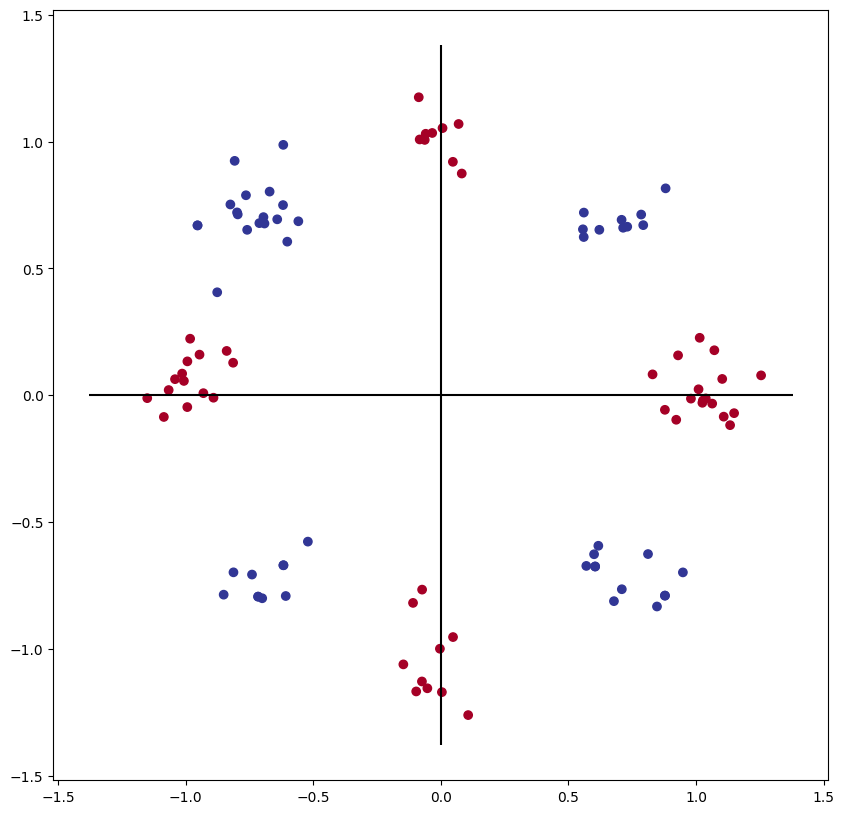

In [1]:
import os, sys, numpy, torch, matplotlib.pyplot, matplotlib.cm, ipycanvas, matplotlib.patches

sys.path += [os.path.abspath(os.path.join('..')), os.path.abspath(os.path.join('../..'))]  # Allow repository modules to be imported

from functools import partial
from utils.optimization import initialize
from utils.plots import plot_train_loss, plot_samples_and_neurons, plot_weights_norms, draw_figure_into_canvas, save_figure
from utils.models import EpsilonNetFullyConnectedNeuralNetwork, FullyConnectedNeuralNetwork
from settings.sphere_2d_epsilon_net import get_dataloader
from experiment import model_summary, plot_neurons_inner_product_to_weights_products, execute_experiment

experiment = {
    'dataset': 'sphere_2d_epsilon_net',
    'epsilon': .4,
    'net_epsilon': .2e-5,
    'seed': 2,
    'input_dimension': 100, 
    'sample_size': 100,  
    'batch_size': 100, 
    'within_cluster_variance': 0.01,
    'epochs': 100000,
    'learning_rate': .1,
    'bias': False,
    'name_parameters': ['seed'],
    'balance_classes': True,
    'initialization_scale': 1.e-5,
    'initial_hidden_units': 100,
    #'initial_weights': [
    #    [[0., 1e-5], [0., -1e-5], [-(.25**.5)*1e-5, -(7.5**.5)*1e-5], [(.5**.5)*1e-5, -(.5**.5)*1e-5], [-(.15**.5)*1e-5, -(.85**.5)*1e-5]]
    #],
    #'output_layer_initial_weights': [-1e-5, 1e-5, 1e-5, 1e-5, 1e-5]
}
rotation_matrix = numpy.identity(experiment['input_dimension'])
device, generator = initialize(experiment['seed'])
train_data = get_dataloader(**experiment, rotation_matrix=rotation_matrix, generator=generator)
test_data = get_dataloader(**experiment, rotation_matrix=rotation_matrix, generator=generator)


#X =[[2**-.5, 2**-.5], [2**-.5, -2**-.5],] + [[1, 0],] * 2
##X =[[1., 1.], [1., -1.],] + [[1., 0.],] * 2
#y = [0, 0, ] + [1, ] * 2
#
#with torch.no_grad():
#    tensor_X = torch.Tensor(X)
#    tensor_y = torch.Tensor(y)
#
#dataset = torch.utils.data.TensorDataset(tensor_X, tensor_y)
#train_data = test_data = torch.utils.data.DataLoader(dataset, len(X), shuffle=True)

fig, ax = matplotlib.pyplot.subplots(figsize=(10, 10))
inputs = []; labels = []
for batch_inputs, batch_labels in train_data: inputs.append(batch_inputs); labels.append(batch_labels)
inputs, labels = torch.concatenate(inputs), torch.concatenate(labels)
inputs_ = numpy.matmul(inputs.detach().cpu().numpy(), rotation_matrix.transpose())
ax.hlines(0, -inputs_.max() * 1.1, inputs_.max() * 1.1, color='k')
ax.vlines(0, -inputs_.max() * 1.1, inputs_.max() * 1.1, color='k')
ax.scatter(inputs_[:, 0], inputs_[:, 1], c=labels, cmap=matplotlib.cm.get_cmap('RdYlBu'))
#nodes = sphere_2d_epsilon_net(**experiment)
#ax.add_patch(matplotlib.patches.Circle([0, 0], 1, color='k', alpha=.1, fill=False))
#for node in nodes:
#    ax.add_patch(matplotlib.patches.Circle(node, experiment['epsilon'], color='k', alpha=.05))

In [2]:
matplotlib.pyplot.ioff()
figure, ((input_domain_ax, loss_ax), (parameters_norms_ax, inner_product_to_weights_product_ax)) = matplotlib.pyplot.subplots(2, 2, figsize=(16, 16))

canvas = ipycanvas.Canvas()
canvas.width, canvas.height = 1200, 1200
canvas.font = '30px arial'
canvas.fill_text('Results will appear as processed', canvas.width / 4, canvas.height / 3)

plot_samples_and_neurons = partial(plot_samples_and_neurons, ax=input_domain_ax, rotation_matrix=rotation_matrix, dataloader=train_data, label_neurons=True)
plot_train_loss = partial(plot_train_loss, ax=loss_ax)
plot_weights_norms = partial(plot_weights_norms, ax=parameters_norms_ax)
plot_neurons_inner_product_to_weights_products = partial(plot_neurons_inner_product_to_weights_products, ax=inner_product_to_weights_product_ax, aggregate_neurons=True)
draw_figure_into_canvas = partial(draw_figure_into_canvas, figure=figure, canvas=canvas)
save_figure = partial(save_figure, figure=figure, parameters=experiment, **experiment)

canvas

Canvas(height=1200, width=1200)

In [3]:
experiment, model, device, generator = execute_experiment(
    **experiment,
    train_data=train_data, 
    test_data=test_data, 
    #model_class=EpsilonNetFullyConnectedNeuralNetwork, 
    model_class=FullyConnectedNeuralNetwork,
    saving_epochs_interval=experiment['epochs'],
    callbacks_epochs=list(range(0, experiment['epochs'], 10000)),
    callbacks=[model_summary, plot_samples_and_neurons, 
               plot_train_loss, plot_weights_norms, 
               plot_neurons_inner_product_to_weights_products, draw_figure_into_canvas, save_figure],
    overwrite=True,
    repeat_nodes=False
)
model(inputs)
outputs = model.activations[-1] @ torch.diag(model.output_layer.weight.flatten())#.sum(dim=1).shape
gamma = (torch.diag((labels * 2. - 1.).flatten()) @ outputs)
gamma_bar = gamma / gamma.sum(dim=1).min()

In [4]:
import scipy
res = scipy.optimize.linprog(torch.ones(gamma_bar.shape[1]).numpy(), A_ub=-gamma_bar.detach().cpu().numpy(), b_ub=-torch.ones(gamma_bar.shape[0]).numpy())
res


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 32.63905224175482
              x: [ 0.000e+00  1.106e+00 ...  0.000e+00  0.000e+00]
            nit: 18
          lower:  residual: [ 0.000e+00  1.106e+00 ...  0.000e+00
                              0.000e+00]
                 marginals: [ 7.851e-01  0.000e+00 ...  7.308e-01
                              1.533e-02]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 1.658e-01  9.123e-02 ...  3.046e-01
                              5.905e-03]
                 marginals: [-0.000e+00 -0.000e+00 ... -0.000e+00
                             -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_

In [5]:
res.x

array([0.        , 1.10612449, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 4.96637806, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 2.28566552,
       5.84835447, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 3.78168553, 0.        , 0.        ,
       0.        , 6.78055184, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 4.81095819, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 3.05933415, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
with torch.no_grad(): model.output_layer.weight.copy_(model.output_layer.weight * torch.tensor(res.x))

model(inputs)
outputs = model.activations[-1] @ torch.diag(model.output_layer.weight.flatten())#.sum(dim=1).shape
gamma = (torch.diag((labels * 2. - 1.).flatten()) @ outputs)
plot_samples_and_neurons(model=model)
draw_figure_into_canvas()
#gamma_bar = gamma / gamma.sum(dim=1).min()
#gamma_bar

In [ ]:
plot_samples_and_neurons(model=model)
draw_figure_into_canvas()

In [6]:

ut, st, vht = torch.Tensor.svd(gamma_bar, some=False,compute_uv=True)
vht=vht.T        
Mt, Nt = ut.shape[0], vht.shape[1] 
rcondt = torch.finfo(st.dtype).eps * max(Mt, Nt)
tolt = torch.max(st) * rcondt
numt= torch.sum(st > tolt, dtype=int)
nullspace = vht[numt:,:].cpu().conj()
nullspace_proj = (nullspace.T @ nullspace)
nullspace

tensor([[ 0.0000, -0.9427,  0.3002, -0.1459,  0.0000],
        [ 0.0000, -0.1965, -0.1459,  0.9696,  0.0000],
        [-0.6784,  0.0000,  0.0000,  0.0000,  0.7347]],
       grad_fn=<SliceBackward0>)

In [180]:
alpha = torch.ones(gamma_bar.shape[1])

In [183]:
alpha_proj = torch.where(alpha!=0, (nullspace_proj @ alpha), alpha)
scaling = alpha_proj[alpha_proj!=0].min()
coordinate = (alpha_proj==scaling).nonzero().flatten()
alpha_scaling = alpha[coordinate]
alpha_proj_scaled = - (alpha_proj / alpha_proj[alpha_proj!=0].min()) * alpha_scaling
print(alpha)
print(alpha_proj)
print(coordinate)
print(scaling)
print(alpha_scaling)
print(alpha_proj_scaled)
alpha += alpha_proj_scaled
print(alpha)
alpha = alpha.abs()
alpha /= alpha[alpha!=0].min()
print(alpha)

tensor([0.0000, 8.2834, 0.0000, 9.5821, 1.0000], grad_fn=<DivBackward0>)
tensor([0.0000, 7.1725, 0.0000, 8.7728, 0.5397], grad_fn=<WhereBackward0>)
tensor([4])
tensor(0.5397, grad_fn=<MinBackward1>)
tensor([1.], grad_fn=<IndexBackward0>)
tensor([ -0.0000, -13.2893,  -0.0000, -16.2543,  -1.0000],
       grad_fn=<MulBackward0>)
tensor([ 0.0000, -5.0059,  0.0000, -6.6722,  0.0000], grad_fn=<AddBackward0>)
tensor([0.0000, 1.0000, 0.0000, 1.3329, 0.0000], grad_fn=<DivBackward0>)


In [178]:
with torch.no_grad():
    model.output_layer.weight.copy_(model.output_layer.weight * alpha)

In [179]:
model(inputs)
outputs = model.activations[-1] @ torch.diag(model.output_layer.weight.flatten())#.sum(dim=1).shape
gamma = (torch.diag((labels * 2. - 1.).flatten()) @ outputs)
gamma

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], grad_fn=<MmBackward0>)

In [168]:

gamma_bar = gamma / gamma.sum(dim=1).min()
gamma_bar

tensor([[nan, nan, nan, nan, nan],
        [nan, inf, nan, inf, nan]], grad_fn=<DivBackward0>)

In [91]:
alpha_proj = torch.where(alpha!=0, (nullspace_proj @ alpha), alpha)
alpha_proj /= alpha_proj[alpha_proj!=0].min()
alpha -= alpha_proj
alpha

tensor([1.0000, 2.8890, 0.0000, 3.2034], grad_fn=<SubBackward0>)

In [59]:

min_coordinate = nullspace_vector[torch.logical_and(nullspace_vector!=0, alpha!=0)].min()
nullspace_vector_scaled = - nullspace_vector / min_coordinate
nullspace_vector_scaled

NameError: name 'nullspace_vector' is not defined

In [16]:

min_coordinate = nullspace_vector[torch.logical_and(nullspace_vector!=0, alpha!=0)].min()
nullspace_vector_scaled = - nullspace_vector / min_coordinate
alpha += nullspace_vector_scaled
print(alpha, nullspace_vector, min_coordinate, nullspace_vector_scaled, '\n')

tensor([1.0000, 0.0000, 0.7009, 2.6717], grad_fn=<AddBackward0>) tensor([ 0.0000, -0.5074, -0.1518,  0.8482], grad_fn=<UnbindBackward0>) tensor(-0.5074, grad_fn=<MinBackward1>) tensor([ 0.0000, -1.0000, -0.2991,  1.6717], grad_fn=<DivBackward0>) 



In [14]:
alpha = torch.ones(gamma_bar.shape[1])
for nullspace_vector in nullspace:
    min_coordinate = nullspace_vector[torch.logical_and(nullspace_vector!=0, alpha!=0)].min()
    nullspace_vector_scaled = - nullspace_vector / min_coordinate
    alpha += nullspace_vector_scaled
    print(alpha, nullspace_vector, min_coordinate, nullspace_vector_scaled, '\n')


tensor([1.0000, 0.0000, 2.6717, 0.7009], grad_fn=<AddBackward0>) tensor([ 0.0000, -0.5074,  0.8482, -0.1518], grad_fn=<UnbindBackward0>) tensor(-0.5074, grad_fn=<MinBackward1>) tensor([ 0.0000, -1.0000,  1.6717, -0.2991], grad_fn=<DivBackward0>) 

tensor([ 1.0000, -3.3434,  1.6717,  6.2900], grad_fn=<AddBackward0>) tensor([ 0.0000, -0.5074, -0.1518,  0.8482], grad_fn=<UnbindBackward0>) tensor(-0.1518, grad_fn=<MinBackward1>) tensor([ 0.0000, -3.3434, -1.0000,  5.5891], grad_fn=<DivBackward0>) 



In [6]:
alpha = torch.ones(gamma_bar.shape[1])
for _ in range(gamma_bar.shape[1]):
    ut, st, vht = torch.Tensor.svd(gamma_bar, some=False,compute_uv=True)
    vht=vht.T        
    Mt, Nt = ut.shape[0], vht.shape[1] 
    rcondt = torch.finfo(st.dtype).eps * max(Mt, Nt)
    tolt = torch.max(st) * rcondt
    numt= torch.sum(st > tolt, dtype=int)
    nullspace = vht[numt:,:].cpu().conj()
    nullspace_proj = (nullspace.T @ nullspace)
    alpha_proj = torch.where(alpha!=0, (nullspace_proj @ alpha), alpha)
    alpha_proj_min = alpha_proj[alpha_proj!=0].min()
    alpha_proj_scaled = - alpha_proj / alpha_proj_min
    alpha += alpha_proj_scaled
    zero_coordinates = (alpha == 0).nonzero()
    gamma_bar[:, zero_coordinates] = 0
    print(alpha, alpha_proj, alpha_proj_min, alpha_proj_scaled, '\n')


tensor([1.0000, 0.0000, 1.6863, 1.6863], grad_fn=<AddBackward0>) tensor([ 0.0000, -0.1919,  0.1317,  0.1317], grad_fn=<WhereBackward0>) tensor(-0.1919, grad_fn=<MinBackward1>) tensor([ 0.0000, -1.0000,  0.6863,  0.6863], grad_fn=<DivBackward0>) 



Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 577, in _pydevd_bundle.pydevd_cython.PyDBFrame._handle_exception
  File "_pydevd_bundle/pydevd_cython.pyx", line 312, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/codespace/.local/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2070, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/codespace/.local/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2106, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


RuntimeError: min(): Expected reduction dim to be specified for input.numel() == 0. Specify the reduction dim with the 'dim' argument.

In [39]:
alpha_proj_scaled

tensor([-0.,  0., -1., -1.], grad_fn=<DivBackward0>)

In [56]:
canonical_vector

tensor([1., 0., 0., 0.])

In [59]:
torch.zeros(gamma_bar.shape[1])

tensor([0., 0., 0., 0.])

In [60]:
canonical_vector_proj# != torch.zeros(gamma_bar.shape[1])

tensor([0., 0., 0., 0.], grad_fn=<MvBackward0>)

In [71]:
alpha!=0

tensor([ True, False,  True,  True])

In [73]:
torch.where(alpha!=0, (nullspace_proj @ alpha), alpha)

tensor([0.0000, 0.0000, 0.3329, 0.3329], grad_fn=<WhereBackward0>)

In [75]:
nullspace_proj = (nullspace.T @ nullspace)
alpha = torch.ones(gamma_bar.shape[1])
for _ in range(nullspace.shape[0]):
    alpha_proj = torch.where(alpha!=0, (nullspace_proj @ alpha), alpha)
    alpha_proj_min = alpha_proj[alpha_proj!=0].min()
    alpha_proj_scaled = - alpha_proj / alpha_proj_min
    alpha += alpha_proj_scaled 
    print(alpha, alpha_proj, alpha_proj_min, alpha_proj_scaled, '\n')



tensor([1.0000, 0.0000, 1.6863, 1.6863], grad_fn=<AddBackward0>) tensor([ 0.0000, -0.1919,  0.1317,  0.1317], grad_fn=<WhereBackward0>) tensor(-0.1919, grad_fn=<MinBackward1>) tensor([ 0.0000, -1.0000,  0.6863,  0.6863], grad_fn=<DivBackward0>) 

tensor([1.0000, 0.0000, 0.6863, 0.6863], grad_fn=<AddBackward0>) tensor([0.0000, 0.0000, 0.8180, 0.8180], grad_fn=<WhereBackward0>) tensor(0.8180, grad_fn=<MinBackward1>) tensor([-0., -0., -1., -1.], grad_fn=<DivBackward0>) 



In [65]:
nullspace_proj = (nullspace.T @ nullspace)
alpha = torch.ones(gamma_bar.shape[1])
for coordinate_to_kill in range(gamma_bar.shape[1]):
    canonical_vector = torch.nn.functional.one_hot(torch.tensor(coordinate_to_kill), gamma_bar.shape[1]).float()
    canonical_vector_proj = nullspace_proj @ canonical_vector
    if not canonical_vector_proj.equal(torch.zeros(gamma_bar.shape[1])):
        canonical_vector_min = canonical_vector_proj[canonical_vector_proj!=0].min()
        canonical_vector_proj_scaled = - canonical_vector_proj / canonical_vector_min
        alpha += canonical_vector_proj_scaled 
        print(alpha, canonical_vector_proj, canonical_vector_min, canonical_vector_proj_scaled, '\n')



tensor([1.0000, 2.4571, 0.0000, 0.0000], grad_fn=<AddBackward0>) tensor([ 0.0000,  0.5149, -0.3534, -0.3534], grad_fn=<MvBackward0>) tensor(-0.3534, grad_fn=<MinBackward1>) tensor([ 0.0000,  1.4571, -1.0000, -1.0000], grad_fn=<DivBackward0>) 

tensor([ 1.0000,  1.4571,  2.1011, -0.7286], grad_fn=<AddBackward0>) tensor([ 0.0000, -0.3534,  0.7425, -0.2575], grad_fn=<MvBackward0>) tensor(-0.3534, grad_fn=<MinBackward1>) tensor([ 0.0000, -1.0000,  2.1011, -0.7286], grad_fn=<DivBackward0>) 

tensor([1.0000, 0.4571, 1.3726, 1.3726], grad_fn=<AddBackward0>) tensor([ 0.0000, -0.3534, -0.2575,  0.7425], grad_fn=<MvBackward0>) tensor(-0.3534, grad_fn=<MinBackward1>) tensor([ 0.0000, -1.0000, -0.7286,  2.1011], grad_fn=<DivBackward0>) 



In [31]:

vector_index, min_coordinate = (nullspace == nullspace.min()).nonzero().flatten().cpu().numpy()
vector = - nullspace[vector_index] / nullspace[vector_index][min_coordinate]
vector_index, min_coordinate, vector

(1, 1, tensor([-0.0000, -1.0000,  0.6863,  0.6863], grad_fn=<DivBackward0>))

In [39]:
nullspace_component = None
vectors = []
for _ in range(len(nullspace)):
    vector_index, min_coordinate = (nullspace == nullspace.min()).nonzero().flatten().cpu().numpy()
    vectors.append(vector_index)
    vector = - nullspace[vector_index] / nullspace[vector_index][min_coordinate]
    if nullspace_component:
        

    else:
        nullspace_component = vector


vector_index, min_coordinate

(3, 5)

In [28]:
len(nullspace)

10